In [2]:
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

<h1>Database<h1>

In [3]:
%run  ../database.ipynb

c:\Users\wwwhh\OneDrive\Desktop\fyp backend\venv\Lib\site-packages\bson\__init__.py:116: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH_NAIVE = datetime.datetime.utcfromtimestamp(0)


<h1>LDA<h1>

<h2>Load data<h2>

In [4]:
preprocessed_content_data = get_all_content()
df = pd.DataFrame(preprocessed_content_data)
preprocessed_text_list = df["preprocessed_token"].to_list()
filtered_tokenized_texts = preprocessed_text_list

<h1>1<h1>

In [17]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])


coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)



Topics and top words:
(0, '0.157*"I" + 0.024*"lot" + 0.015*"day" + 0.013*"great" + 0.011*"woman"')
(1, '0.059*"god" + 0.021*"religion" + 0.014*"human" + 0.011*"believe" + 0.011*"ancient"')
(2, '0.068*"language" + 0.049*"sumerian" + 0.047*"write" + 0.022*"word" + 0.021*"use"')
(3, '0.025*"year" + 0.017*"early" + 0.016*"bc" + 0.014*"site" + 0.012*"evidence"')
(4, '0.081*"civilization" + 0.037*"ancient" + 0.022*"sumerian" + 0.021*"culture" + 0.018*"egypt"')
(5, '0.031*"use" + 0.013*"earth" + 0.008*"ancient" + 0.008*"planet" + 0.008*"water"')
(6, '0.026*"flood" + 0.026*"city" + 0.022*"great" + 0.021*"king" + 0.017*"story"')
(7, '0.103*"chinese" + 0.071*"dynasty" + 0.046*"china" + 0.030*"shang" + 0.025*"ancient"')
(8, '0.019*"ancient" + 0.018*"sumerian" + 0.017*"assyrian" + 0.016*"mesopotamia" + 0.015*"east"')
(9, '0.046*"china" + 0.017*"empire" + 0.014*"india" + 0.014*"country" + 0.013*"war"')

Topic distribution for the first document:
[(1, 0.22107324), (4, 0.4666877), (6, 0.30828273)]

C

<h1>2<h1>

In [18]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=80, no_above=7500)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("alpha: ", np.mean(lda_model.alpha))
print("eta: ", np.mean(lda_model.eta))

Topics and top words:
(0, '0.023*"empire" + 0.015*"war" + 0.014*"power" + 0.012*"state" + 0.011*"city"')
(1, '0.096*"chinese" + 0.077*"china" + 0.061*"dynasty" + 0.025*"emperor" + 0.023*"shang"')
(2, '0.038*"god" + 0.014*"king" + 0.014*"earth" + 0.010*"man" + 0.010*"music"')
(3, '0.042*"sumerian" + 0.031*"civilization" + 0.027*"flood" + 0.021*"city" + 0.015*"mesopotamia"')
(4, '0.019*"year" + 0.014*"human" + 0.013*"use" + 0.013*"language" + 0.012*"mean"')
(5, '0.034*"write" + 0.027*"use" + 0.016*"early" + 0.016*"bc" + 0.014*"site"')
(6, '0.058*"language" + 0.049*"sumerian" + 0.031*"ancient" + 0.018*"assyrian" + 0.017*"egyptian"')
(7, '0.198*"I" + 0.030*"lot" + 0.019*"day" + 0.016*"great" + 0.012*"interested"')
(8, '0.040*"india" + 0.024*"china" + 0.024*"world" + 0.019*"europe" + 0.019*"asia"')
(9, '0.049*"civilization" + 0.039*"ancient" + 0.029*"culture" + 0.014*"society" + 0.014*"religion"')

Topic distribution for the first document:
[(3, 0.52816916), (9, 0.46745798)]

Coherence Scor

<h1>3<h1>

In [19]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)
dictionary.filter_extremes(no_below=90, no_above=7300)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("alpha: ", np.mean(lda_model.alpha))
print("eta: ", np.mean(lda_model.eta))

Topics and top words:
(0, '0.186*"I" + 0.028*"lot" + 0.017*"day" + 0.016*"great" + 0.012*"interested"')
(1, '0.053*"dynasty" + 0.028*"empire" + 0.022*"china" + 0.021*"emperor" + 0.019*"shang"')
(2, '0.057*"civilization" + 0.041*"ancient" + 0.021*"egypt" + 0.016*"egyptian" + 0.016*"culture"')
(3, '0.095*"sumerian" + 0.030*"city" + 0.027*"mesopotamia" + 0.025*"write" + 0.017*"civilization"')
(4, '0.155*"chinese" + 0.153*"china" + 0.032*"ancient" + 0.022*"country" + 0.022*"japan"')
(5, '0.036*"language" + 0.025*"write" + 0.024*"use" + 0.014*"word" + 0.014*"year"')
(6, '0.041*"india" + 0.015*"world" + 0.015*"asia" + 0.015*"population" + 0.014*"east"')
(7, '0.015*"man" + 0.012*"I" + 0.011*"woman" + 0.010*"use" + 0.009*"year"')
(8, '0.047*"god" + 0.022*"flood" + 0.018*"earth" + 0.015*"story" + 0.014*"king"')
(9, '0.015*"society" + 0.012*"culture" + 0.012*"world" + 0.010*"human" + 0.008*"social"')

Topic distribution for the first document:
[(2, 0.16574955), (3, 0.04690757), (8, 0.42156357), 

<h1>4<h1>

In [20]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=80, no_above=7500)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, 
                     passes=40, iterations=100, alpha='auto', 
                     eta='auto', random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("alpha: ", np.mean(lda_model.alpha))
print("eta: ", np.mean(lda_model.eta))

Topics and top words:
(0, '0.019*"society" + 0.014*"trade" + 0.013*"social" + 0.013*"development" + 0.013*"city"')
(1, '0.176*"chinese" + 0.132*"china" + 0.043*"dynasty" + 0.021*"history" + 0.020*"ancient"')
(2, '0.028*"flood" + 0.025*"god" + 0.023*"story" + 0.020*"king" + 0.015*"earth"')
(3, '0.071*"sumerian" + 0.041*"civilization" + 0.037*"mesopotamia" + 0.035*"city" + 0.019*"bc"')
(4, '0.021*"year" + 0.019*"use" + 0.012*"music" + 0.008*"build" + 0.008*"water"')
(5, '0.067*"write" + 0.034*"use" + 0.024*"bc" + 0.021*"character" + 0.020*"script"')
(6, '0.041*"dynasty" + 0.033*"empire" + 0.023*"emperor" + 0.017*"king" + 0.014*"great"')
(7, '0.099*"india" + 0.065*"year" + 0.054*"tamil" + 0.054*"indian" + 0.054*"old"')
(8, '0.045*"china" + 0.027*"country" + 0.026*"world" + 0.020*"india" + 0.016*"japan"')
(9, '0.075*"ancient" + 0.067*"civilization" + 0.036*"culture" + 0.021*"history" + 0.020*"egypt"')
(10, '0.085*"god" + 0.053*"religion" + 0.029*"human" + 0.022*"believe" + 0.018*"worship"'

<h1>5<h1>

In [21]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, 
                     passes=40, iterations=100, alpha=0.3, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("alpha: ", np.mean(lda_model.alpha))
print("eta: ", np.mean(lda_model.eta))

Topics and top words:
(0, '0.218*"I" + 0.033*"lot" + 0.022*"day" + 0.018*"great" + 0.016*"man"')
(1, '0.086*"god" + 0.031*"religion" + 0.016*"son" + 0.015*"human" + 0.014*"king"')
(2, '0.108*"language" + 0.062*"write" + 0.031*"word" + 0.031*"use" + 0.027*"character"')
(3, '0.142*"civilization" + 0.061*"ancient" + 0.051*"egypt" + 0.040*"egyptian" + 0.024*"culture"')
(4, '0.147*"sumerian" + 0.052*"city" + 0.046*"mesopotamia" + 0.029*"civilization" + 0.028*"ancient"')
(5, '0.030*"use" + 0.024*"year" + 0.013*"human" + 0.011*"earth" + 0.009*"water"')
(6, '0.050*"flood" + 0.047*"story" + 0.027*"music" + 0.019*"myth" + 0.018*"water"')
(7, '0.037*"ancient" + 0.026*"culture" + 0.021*"history" + 0.021*"greek" + 0.014*"book"')
(8, '0.022*"black" + 0.022*"africa" + 0.021*"east" + 0.019*"population" + 0.018*"europe"')
(9, '0.134*"china" + 0.069*"chinese" + 0.031*"country" + 0.018*"japan" + 0.018*"world"')
(10, '0.045*"empire" + 0.022*"war" + 0.017*"great" + 0.014*"power" + 0.013*"land"')
(11, '0.11

<h1>6<h1>

In [22]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=12, id2word=dictionary, 
                     passes=60, iterations=120, alpha=0.5, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.190*"I" + 0.030*"lot" + 0.019*"day" + 0.015*"great" + 0.014*"work"')
(1, '0.076*"god" + 0.028*"religion" + 0.014*"believe" + 0.013*"son" + 0.013*"human"')
(2, '0.098*"sumerian" + 0.083*"language" + 0.056*"write" + 0.027*"use" + 0.027*"word"')
(3, '0.026*"culture" + 0.023*"society" + 0.013*"cultural" + 0.012*"social" + 0.011*"influence"')
(4, '0.120*"civilization" + 0.090*"ancient" + 0.043*"egypt" + 0.035*"egyptian" + 0.028*"culture"')
(5, '0.028*"use" + 0.024*"year" + 0.013*"human" + 0.010*"water" + 0.009*"animal"')
(6, '0.042*"flood" + 0.041*"story" + 0.026*"book" + 0.018*"myth" + 0.018*"history"')
(7, '0.033*"early" + 0.033*"bc" + 0.021*"period" + 0.021*"century" + 0.019*"th"')
(8, '0.020*"east" + 0.018*"africa" + 0.017*"black" + 0.017*"population" + 0.016*"group"')
(9, '0.064*"china" + 0.023*"country" + 0.022*"india" + 0.017*"world" + 0.017*"war"')
(10, '0.042*"city" + 0.034*"king" + 0.028*"empire" + 0.018*"great" + 0.015*"land"')
(11, '0.096*"chinese" +

<h1>7<h1>

In [23]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=8, id2word=dictionary, 
                     passes=60, iterations=120, alpha=0.7, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.144*"I" + 0.023*"lot" + 0.015*"day" + 0.012*"great" + 0.012*"work"')
(1, '0.046*"god" + 0.021*"flood" + 0.018*"story" + 0.018*"religion" + 0.013*"human"')
(2, '0.072*"sumerian" + 0.056*"language" + 0.042*"write" + 0.018*"use" + 0.018*"word"')
(3, '0.021*"year" + 0.013*"human" + 0.012*"ago" + 0.011*"east" + 0.011*"evidence"')
(4, '0.074*"civilization" + 0.045*"ancient" + 0.027*"culture" + 0.023*"egypt" + 0.015*"egyptian"')
(5, '0.017*"city" + 0.015*"year" + 0.015*"use" + 0.011*"king" + 0.011*"water"')
(6, '0.028*"empire" + 0.023*"china" + 0.017*"war" + 0.015*"country" + 0.015*"india"')
(7, '0.095*"chinese" + 0.075*"china" + 0.062*"dynasty" + 0.026*"emperor" + 0.021*"ancient"')

Topic distribution for the first document:
[(1, 0.5233652), (2, 0.014590822), (4, 0.43542957)]

Coherence Score: 0.5565238363652877


<h1>8<h1>

In [24]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=60, iterations=150, alpha=0.7, eta="auto", random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.384*"I" + 0.061*"lot" + 0.037*"day" + 0.031*"great" + 0.021*"interested"')
(1, '0.120*"god" + 0.047*"religion" + 0.035*"human" + 0.026*"believe" + 0.018*"worship"')
(2, '0.131*"language" + 0.088*"write" + 0.042*"word" + 0.040*"use" + 0.033*"character"')
(3, '0.363*"ancient" + 0.085*"egyptian" + 0.071*"egypt" + 0.041*"black" + 0.019*"african"')
(4, '0.224*"civilization" + 0.047*"bce" + 0.037*"valley" + 0.031*"indus" + 0.029*"river"')
(5, '0.053*"use" + 0.031*"earth" + 0.019*"planet" + 0.017*"sun" + 0.016*"day"')
(6, '0.276*"sumerian" + 0.054*"mesopotamia" + 0.041*"sumer" + 0.039*"assyrian" + 0.038*"akkadian"')
(7, '0.063*"greek" + 0.053*"century" + 0.042*"th" + 0.037*"book" + 0.024*"history"')
(8, '0.038*"mean" + 0.025*"way" + 0.023*"question" + 0.022*"different" + 0.021*"answer"')
(9, '0.188*"china" + 0.116*"chinese" + 0.042*"country" + 0.025*"japan" + 0.023*"korea"')
(10, '0.057*"empire" + 0.033*"war" + 0.019*"power" + 0.019*"great" + 0.016*"army"')
(11, '

<h1>9<h1>

In [25]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=60, iterations=150, alpha=0.7, eta=0.5, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.421*"I" + 0.067*"lot" + 0.039*"day" + 0.033*"great" + 0.023*"interested"')
(1, '0.108*"god" + 0.047*"religion" + 0.034*"human" + 0.025*"believe" + 0.017*"worship"')
(2, '0.124*"language" + 0.081*"write" + 0.039*"word" + 0.036*"use" + 0.032*"character"')
(3, '0.358*"ancient" + 0.078*"egyptian" + 0.063*"egypt" + 0.039*"black" + 0.018*"african"')
(4, '0.211*"civilization" + 0.040*"bce" + 0.034*"valley" + 0.029*"indus" + 0.028*"river"')
(5, '0.062*"use" + 0.030*"earth" + 0.019*"planet" + 0.017*"sun" + 0.016*"star"')
(6, '0.052*"europe" + 0.051*"european" + 0.049*"world" + 0.034*"country" + 0.025*"nation"')
(7, '0.057*"greek" + 0.049*"century" + 0.041*"th" + 0.034*"book" + 0.022*"history"')
(8, '0.034*"mean" + 0.024*"way" + 0.021*"question" + 0.019*"answer" + 0.019*"different"')
(9, '0.192*"china" + 0.131*"chinese" + 0.028*"country" + 0.025*"japan" + 0.024*"korea"')
(10, '0.055*"empire" + 0.033*"war" + 0.021*"great" + 0.018*"power" + 0.017*"conquer"')
(11, '0.10

<h1>10<h1>

In [26]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, 
                     passes=80, iterations=150, alpha=0.7, eta=0.5, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.180*"I" + 0.028*"lot" + 0.017*"day" + 0.015*"great" + 0.014*"woman"')
(1, '0.053*"god" + 0.024*"flood" + 0.021*"story" + 0.018*"religion" + 0.016*"earth"')
(2, '0.097*"sumerian" + 0.074*"language" + 0.051*"write" + 0.025*"use" + 0.024*"word"')
(3, '0.020*"society" + 0.017*"culture" + 0.011*"cultural" + 0.010*"social" + 0.010*"city"')
(4, '0.114*"civilization" + 0.096*"ancient" + 0.041*"egypt" + 0.034*"egyptian" + 0.030*"culture"')
(5, '0.022*"use" + 0.019*"year" + 0.011*"water" + 0.010*"human" + 0.008*"build"')
(6, '0.039*"dynasty" + 0.033*"empire" + 0.027*"king" + 0.019*"emperor" + 0.017*"shang"')
(7, '0.027*"early" + 0.026*"bc" + 0.021*"year" + 0.019*"evidence" + 0.015*"period"')
(8, '0.019*"europe" + 0.018*"population" + 0.018*"east" + 0.016*"european" + 0.015*"asia"')
(9, '0.101*"china" + 0.088*"chinese" + 0.019*"country" + 0.017*"india" + 0.016*"dynasty"')

Topic distribution for the first document:
[(1, 0.43590862), (2, 0.020478316), (3, 0.29988188), 

<h1>11<h1>

In [5]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=25, id2word=dictionary, 
                     passes=60, iterations=125, alpha=0.7, eta=0.7, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(7, '0.092*"century" + 0.087*"greek" + 0.067*"th" + 0.045*"roman" + 0.031*"greece"')
(10, '0.080*"empire" + 0.048*"war" + 0.025*"conquer" + 0.023*"army" + 0.022*"military"')
(14, '0.165*"india" + 0.072*"indus" + 0.061*"valley" + 0.058*"indian" + 0.052*"tamil"')
(23, '0.026*"group" + 0.022*"population" + 0.018*"east" + 0.018*"genetic" + 0.018*"arab"')
(22, '0.119*"write" + 0.043*"use" + 0.041*"character" + 0.028*"script" + 0.027*"chinese"')
(3, '0.338*"ancient" + 0.114*"egyptian" + 0.075*"egypt" + 0.042*"black" + 0.022*"african"')
(0, '0.423*"I" + 0.067*"lot" + 0.039*"day" + 0.032*"great" + 0.023*"interested"')
(1, '0.047*"man" + 0.030*"woman" + 0.023*"son" + 0.018*"child" + 0.014*"father"')
(11, '0.109*"dynasty" + 0.046*"emperor" + 0.036*"shang" + 0.035*"chinese" + 0.027*"china"')
(9, '0.261*"china" + 0.184*"chinese" + 0.032*"japan" + 0.030*"korea" + 0.029*"korean"')
(6, '0.068*"country" + 0.026*"trade" + 0.022*"government" + 0.020*"nation" + 0.019*"world"')
(16, 

<h1>12<h1>

In [6]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=100, id2word=dictionary, 
                     passes=100, iterations=500, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(10, '0.221*"assyrian" + 0.158*"babylon" + 0.102*"empire" + 0.079*"assyria" + 0.071*"conquer"')
(80, '0.076*"economic" + 0.072*"economy" + 0.071*"lead" + 0.067*"class" + 0.050*"resource"')
(40, '0.646*"culture" + 0.094*"european" + 0.058*"cultural" + 0.029*"influence" + 0.027*"ancient culture"')
(18, '0.168*"indus" + 0.167*"valley" + 0.100*"civilization" + 0.098*"river" + 0.067*"pakistan"')
(97, '0.095*"long" + 0.072*"foot" + 0.066*"pay" + 0.050*"free" + 0.047*"deal"')
(46, '0.174*"record" + 0.056*"historical" + 0.049*"write" + 0.048*"history" + 0.047*"present"')
(98, '0.102*"korea" + 0.099*"korean" + 0.044*"kingdom" + 0.037*"invade" + 0.032*"invasion"')
(19, '0.294*"tribe" + 0.234*"rome" + 0.083*"lose" + 0.069*"persia" + 0.064*"israel"')
(27, '0.221*"middle" + 0.161*"persian" + 0.135*"iran" + 0.130*"east" + 0.084*"middle east"')
(74, '0.251*"earth" + 0.119*"planet" + 0.092*"star" + 0.073*"sky" + 0.041*"day"')
(89, '0.111*"tang" + 0.076*"term" + 0.054*"wu" + 0.047

<h1>13<h1>

In [7]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=200, iterations=300, random_state=70,
                     alpha=100, eta="symmetric")

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("alpha: ", np.mean(lda_model.alpha))
print("eta: ", np.mean(lda_model.eta))

Topics and top words:
(0, '0.055*"human" + 0.038*"year" + 0.030*"ago" + 0.029*"evidence" + 0.019*"animal"')
(1, '0.345*"I" + 0.067*"great" + 0.056*"day" + 0.054*"lot" + 0.040*"work"')
(2, '0.042*"year" + 0.033*"mean" + 0.031*"way" + 0.018*"today" + 0.016*"place"')
(3, '0.028*"use" + 0.023*"culture" + 0.022*"form" + 0.021*"believe" + 0.020*"ancient"')
(4, '0.044*"early" + 0.022*"large" + 0.016*"build" + 0.015*"site" + 0.015*"near"')
(5, '0.052*"god" + 0.027*"earth" + 0.023*"son" + 0.023*"water" + 0.022*"music"')
(6, '0.038*"history" + 0.029*"world" + 0.026*"ancient" + 0.025*"use" + 0.017*"far"')
(7, '0.054*"flood" + 0.050*"story" + 0.033*"book" + 0.025*"god" + 0.023*"greek"')
(8, '0.125*"dynasty" + 0.037*"shang" + 0.033*"state" + 0.025*"rule" + 0.021*"history"')
(9, '0.237*"china" + 0.189*"chinese" + 0.048*"country" + 0.029*"war" + 0.025*"japan"')
(10, '0.066*"bc" + 0.051*"city" + 0.046*"empire" + 0.041*"king" + 0.035*"mesopotamia"')
(11, '0.046*"emperor" + 0.030*"han" + 0.026*"empire" 

<h1>14<h1>

In [8]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=500, iterations=600, random_state=70,
                     alpha="asymmetric")

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

print("alpha: ", np.mean(lda_model.alpha))
print("eta: ", np.mean(lda_model.eta))

Topics and top words:
(0, '0.225*"I" + 0.034*"lot" + 0.020*"day" + 0.018*"great" + 0.014*"work"')
(1, '0.096*"god" + 0.036*"religion" + 0.023*"human" + 0.018*"believe" + 0.015*"ancient"')
(2, '0.225*"sumerian" + 0.036*"mesopotamia" + 0.033*"cuneiform" + 0.032*"korea" + 0.031*"write"')
(3, '0.020*"society" + 0.014*"culture" + 0.012*"social" + 0.012*"cultural" + 0.011*"civilization"')
(4, '0.124*"civilization" + 0.084*"ancient" + 0.049*"egypt" + 0.041*"egyptian" + 0.029*"culture"')
(5, '0.042*"use" + 0.029*"earth" + 0.025*"year" + 0.020*"planet" + 0.019*"ancient"')
(6, '0.057*"assyrian" + 0.047*"babylonian" + 0.040*"mesopotamia" + 0.036*"ancient" + 0.035*"babylon"')
(7, '0.095*"language" + 0.052*"write" + 0.032*"word" + 0.027*"use" + 0.017*"speak"')
(8, '0.054*"black" + 0.037*"term" + 0.025*"mean" + 0.024*"white" + 0.021*"african"')
(9, '0.260*"chinese" + 0.085*"china" + 0.048*"ancient" + 0.043*"culture" + 0.039*"korean"')
(10, '0.053*"empire" + 0.030*"war" + 0.020*"power" + 0.017*"army"

<h1>15<h1>

In [9]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=80, iterations=120, alpha=0.8, eta=0.6, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.463*"I" + 0.073*"lot" + 0.044*"day" + 0.037*"great" + 0.025*"interested"')
(1, '0.102*"god" + 0.047*"religion" + 0.032*"human" + 0.025*"believe" + 0.017*"worship"')
(2, '0.124*"language" + 0.083*"write" + 0.041*"word" + 0.037*"use" + 0.031*"character"')
(3, '0.336*"ancient" + 0.087*"egyptian" + 0.076*"egypt" + 0.037*"black" + 0.019*"african"')
(4, '0.022*"civilization" + 0.019*"culture" + 0.018*"cultural" + 0.018*"influence" + 0.015*"society"')
(5, '0.063*"use" + 0.032*"earth" + 0.020*"planet" + 0.019*"year" + 0.018*"sun"')
(6, '0.067*"world" + 0.041*"country" + 0.034*"europe" + 0.031*"european" + 0.030*"western"')
(7, '0.055*"greek" + 0.039*"century" + 0.035*"th" + 0.035*"book" + 0.027*"history"')
(8, '0.032*"mean" + 0.026*"way" + 0.021*"question" + 0.019*"answer" + 0.018*"different"')
(9, '0.222*"china" + 0.179*"chinese" + 0.027*"japan" + 0.026*"korea" + 0.025*"korean"')
(10, '0.060*"empire" + 0.035*"war" + 0.021*"great" + 0.018*"conquer" + 0.017*"army"')

<h1>16<h1>

In [10]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=80, iterations=120, alpha=0.4, eta=0.6, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.298*"I" + 0.046*"lot" + 0.026*"day" + 0.022*"great" + 0.016*"interested"')
(1, '0.097*"god" + 0.044*"religion" + 0.028*"human" + 0.021*"believe" + 0.015*"worship"')
(2, '0.132*"write" + 0.044*"character" + 0.041*"use" + 0.036*"chinese" + 0.035*"script"')
(3, '0.264*"ancient" + 0.074*"greek" + 0.063*"egyptian" + 0.058*"egypt" + 0.027*"greece"')
(4, '0.212*"civilization" + 0.032*"valley" + 0.030*"culture" + 0.029*"bce" + 0.028*"indus"')
(5, '0.047*"use" + 0.026*"earth" + 0.018*"planet" + 0.015*"star" + 0.014*"sun"')
(6, '0.041*"world" + 0.024*"century" + 0.023*"country" + 0.020*"european" + 0.018*"europe"')
(7, '0.135*"language" + 0.043*"sumerian" + 0.039*"word" + 0.028*"speak" + 0.019*"mean"')
(8, '0.042*"black" + 0.030*"african" + 0.025*"genetic" + 0.023*"arab" + 0.019*"population"')
(9, '0.184*"china" + 0.124*"chinese" + 0.024*"japan" + 0.023*"korea" + 0.022*"korean"')
(10, '0.066*"empire" + 0.035*"war" + 0.020*"conquer" + 0.019*"army" + 0.019*"great"')
(1

<h1>17<h1>

In [11]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=80, iterations=120, alpha=0.2, eta=0.8, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.410*"I" + 0.056*"lot" + 0.034*"day" + 0.028*"great" + 0.022*"interested"')
(1, '0.086*"god" + 0.044*"religion" + 0.019*"human" + 0.018*"believe" + 0.014*"worship"')
(2, '0.109*"write" + 0.043*"character" + 0.036*"use" + 0.035*"chinese" + 0.031*"script"')
(3, '0.023*"civilization" + 0.015*"culture" + 0.014*"society" + 0.014*"cultural" + 0.012*"influence"')
(4, '0.117*"civilization" + 0.083*"ancient" + 0.050*"egypt" + 0.040*"egyptian" + 0.031*"greek"')
(5, '0.040*"use" + 0.030*"earth" + 0.019*"planet" + 0.019*"ancient" + 0.016*"star"')
(6, '0.037*"world" + 0.026*"country" + 0.021*"europe" + 0.020*"china" + 0.020*"european"')
(7, '0.131*"language" + 0.041*"sumerian" + 0.035*"word" + 0.025*"speak" + 0.015*"mean"')
(8, '0.023*"black" + 0.019*"east" + 0.018*"africa" + 0.017*"african" + 0.017*"ancient"')
(9, '0.161*"china" + 0.135*"chinese" + 0.033*"ancient" + 0.020*"culture" + 0.014*"ancient china"')
(10, '0.064*"empire" + 0.029*"war" + 0.018*"conquer" + 0.018*"a

<h1>18<h1>

In [12]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=90, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=120, iterations=120, alpha=0.4, eta=0.4, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.018*"way" + 0.016*"mean" + 0.014*"question" + 0.013*"answer" + 0.012*"actually"')
(1, '0.107*"dynasty" + 0.045*"emperor" + 0.033*"shang" + 0.031*"china" + 0.029*"chinese"')
(2, '0.068*"empire" + 0.029*"war" + 0.021*"conquer" + 0.020*"great" + 0.016*"army"')
(3, '0.601*"I" + 0.093*"lot" + 0.054*"day" + 0.042*"great" + 0.032*"interested"')
(4, '0.013*"city" + 0.012*"king" + 0.011*"let" + 0.008*"year" + 0.008*"man"')
(5, '0.022*"east" + 0.022*"black" + 0.021*"africa" + 0.017*"asia" + 0.017*"group"')
(6, '0.152*"india" + 0.059*"indian" + 0.054*"tamil" + 0.047*"civilisation" + 0.033*"old"')
(7, '0.048*"man" + 0.042*"woman" + 0.027*"child" + 0.024*"family" + 0.013*"society"')
(8, '0.048*"earth" + 0.030*"planet" + 0.028*"sun" + 0.026*"ancient" + 0.024*"use"')
(9, '0.020*"society" + 0.014*"culture" + 0.014*"cultural" + 0.013*"social" + 0.012*"influence"')
(10, '0.112*"language" + 0.070*"write" + 0.037*"word" + 0.032*"use" + 0.028*"character"')
(11, '0.051*"year" + 

<h1>19<h1>

In [13]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=85, no_above=6800)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=18, id2word=dictionary, 
                     passes=150, iterations=150, alpha=0.3, eta=0.3, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.243*"chinese" + 0.196*"china" + 0.068*"ancient" + 0.029*"history" + 0.025*"year"')
(1, '0.022*"black" + 0.020*"east" + 0.020*"africa" + 0.017*"asia" + 0.016*"african"')
(2, '0.053*"china" + 0.045*"dynasty" + 0.032*"japan" + 0.030*"korea" + 0.029*"korean"')
(3, '0.032*"use" + 0.028*"book" + 0.018*"read" + 0.015*"learn" + 0.014*"write"')
(4, '0.131*"ancient" + 0.081*"egyptian" + 0.074*"greek" + 0.061*"egypt" + 0.031*"roman"')
(5, '0.060*"god" + 0.028*"flood" + 0.024*"story" + 0.015*"earth" + 0.013*"myth"')
(6, '0.106*"sumerian" + 0.034*"mesopotamia" + 0.033*"city" + 0.026*"king" + 0.020*"assyrian"')
(7, '0.099*"language" + 0.056*"write" + 0.032*"word" + 0.029*"sumerian" + 0.026*"use"')
(8, '0.427*"I" + 0.064*"lot" + 0.038*"day" + 0.029*"great" + 0.023*"interested"')
(9, '0.095*"dynasty" + 0.049*"emperor" + 0.040*"shang" + 0.023*"king" + 0.016*"rule"')
(10, '0.017*"king" + 0.014*"city" + 0.013*"man" + 0.013*"son" + 0.011*"great"')
(11, '0.055*"year" + 0.025*"h

<h1>20<h1>

In [14]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=85, no_above=6800)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=18, id2word=dictionary, 
                     passes=150, iterations=120, alpha=0.3, eta=0.3, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.224*"chinese" + 0.212*"china" + 0.059*"ancient" + 0.023*"history" + 0.023*"year"')
(1, '0.022*"black" + 0.022*"east" + 0.020*"africa" + 0.017*"asia" + 0.016*"african"')
(2, '0.049*"dynasty" + 0.042*"china" + 0.034*"japan" + 0.032*"korea" + 0.031*"korean"')
(3, '0.055*"write" + 0.046*"use" + 0.028*"character" + 0.026*"word" + 0.024*"mean"')
(4, '0.098*"ancient" + 0.075*"egyptian" + 0.065*"greek" + 0.051*"egypt" + 0.030*"bc"')
(5, '0.073*"god" + 0.030*"religion" + 0.018*"human" + 0.017*"ancient" + 0.016*"earth"')
(6, '0.038*"flood" + 0.032*"king" + 0.026*"story" + 0.015*"babylonian" + 0.015*"city"')
(7, '0.135*"language" + 0.132*"sumerian" + 0.025*"akkadian" + 0.025*"tamil" + 0.024*"speak"')
(8, '0.433*"I" + 0.065*"lot" + 0.039*"day" + 0.030*"great" + 0.023*"interested"')
(9, '0.087*"dynasty" + 0.045*"emperor" + 0.037*"shang" + 0.021*"chinese" + 0.018*"king"')
(10, '0.016*"city" + 0.012*"man" + 0.012*"king" + 0.012*"water" + 0.012*"son"')
(11, '0.044*"year" +

<h1>21<h1>

In [15]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=25, id2word=dictionary, 
                     passes=60, iterations=125, alpha=1, eta=0.5, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(7, '0.023*"site" + 0.020*"music" + 0.018*"city" + 0.016*"stone" + 0.013*"early"')
(10, '0.070*"empire" + 0.031*"war" + 0.026*"great" + 0.021*"conquer" + 0.018*"army"')
(14, '0.174*"sumerian" + 0.061*"city" + 0.046*"mesopotamia" + 0.040*"king" + 0.027*"assyrian"')
(23, '0.123*"language" + 0.029*"speak" + 0.028*"tamil" + 0.023*"group" + 0.019*"relate"')
(22, '0.330*"chinese" + 0.032*"character" + 0.021*"learn" + 0.018*"chinese character" + 0.015*"school"')
(3, '0.112*"egyptian" + 0.092*"egypt" + 0.051*"black" + 0.035*"african" + 0.028*"africa"')
(0, '0.467*"I" + 0.074*"lot" + 0.045*"day" + 0.038*"great" + 0.026*"interested"')
(1, '0.051*"history" + 0.045*"book" + 0.025*"read" + 0.019*"claim" + 0.017*"historical"')
(11, '0.119*"dynasty" + 0.050*"china" + 0.049*"emperor" + 0.038*"shang" + 0.030*"han"')
(9, '0.234*"china" + 0.087*"india" + 0.073*"country" + 0.020*"world" + 0.019*"indian"')
(6, '0.060*"japan" + 0.057*"korea" + 0.055*"korean" + 0.047*"japanese" + 0.016*

<h1>22<h1>

In [16]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=110, no_above=6900)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=22, id2word=dictionary, 
                     passes=100, iterations=140, alpha=0.2, eta=0.8, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(3, '0.063*"empire" + 0.056*"greek" + 0.053*"century" + 0.041*"th" + 0.038*"roman"')
(5, '0.119*"china" + 0.115*"chinese" + 0.052*"dynasty" + 0.041*"emperor" + 0.031*"han"')
(20, '0.049*"year" + 0.027*"human" + 0.018*"ago" + 0.018*"earth" + 0.014*"ancient"')
(1, '0.138*"civilization" + 0.062*"ancient" + 0.049*"egypt" + 0.034*"egyptian" + 0.029*"indus"')
(0, '0.083*"china" + 0.054*"india" + 0.037*"country" + 0.019*"world" + 0.015*"chinese"')
(19, '0.083*"dynasty" + 0.050*"shang" + 0.026*"chinese" + 0.023*"king" + 0.019*"history"')
(18, '0.025*"book" + 0.016*"read" + 0.015*"history" + 0.014*"use" + 0.014*"mean"')
(2, '0.063*"korea" + 0.062*"japan" + 0.062*"korean" + 0.052*"japanese" + 0.049*"use"')
(15, '0.018*"site" + 0.014*"early" + 0.014*"use" + 0.013*"city" + 0.012*"music"')
(4, '0.101*"write" + 0.044*"chinese" + 0.042*"character" + 0.039*"use" + 0.033*"script"')
(21, '0.031*"woman" + 0.028*"man" + 0.016*"child" + 0.014*"life" + 0.014*"family"')
(8, '0.069*"floo

<h1>23<h1>

In [17]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=100, iterations=120, alpha=0.5, eta=0.2, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.423*"I" + 0.067*"lot" + 0.040*"day" + 0.032*"great" + 0.023*"interested"')
(1, '0.113*"god" + 0.047*"religion" + 0.029*"human" + 0.024*"believe" + 0.017*"worship"')
(2, '0.125*"language" + 0.081*"write" + 0.039*"word" + 0.035*"use" + 0.031*"character"')
(3, '0.336*"ancient" + 0.092*"egyptian" + 0.089*"greek" + 0.083*"egypt" + 0.032*"greece"')
(4, '0.223*"civilization" + 0.051*"culture" + 0.036*"bce" + 0.034*"valley" + 0.028*"indus"')
(5, '0.056*"use" + 0.035*"earth" + 0.020*"planet" + 0.018*"sun" + 0.017*"day"')
(6, '0.122*"world" + 0.109*"century" + 0.082*"th" + 0.041*"music" + 0.023*"history"')
(7, '0.023*"mean" + 0.020*"way" + 0.018*"question" + 0.017*"answer" + 0.015*"different"')
(8, '0.037*"black" + 0.032*"group" + 0.025*"african" + 0.021*"genetic" + 0.020*"arab"')
(9, '0.194*"china" + 0.130*"chinese" + 0.034*"country" + 0.025*"japan" + 0.024*"korea"')
(10, '0.065*"empire" + 0.038*"war" + 0.022*"great" + 0.021*"power" + 0.020*"conquer"')
(11, '0.101*"

<h1>24<h1>

In [18]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=18, id2word=dictionary, 
                     passes=100, iterations=150, alpha=0.9, eta=0.2, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.409*"I" + 0.065*"lot" + 0.041*"day" + 0.034*"great" + 0.022*"work"')
(1, '0.101*"god" + 0.045*"religion" + 0.033*"human" + 0.026*"believe" + 0.017*"worship"')
(2, '0.123*"language" + 0.085*"write" + 0.044*"word" + 0.040*"use" + 0.031*"character"')
(3, '0.290*"ancient" + 0.065*"egyptian" + 0.050*"egypt" + 0.035*"black" + 0.021*"african"')
(4, '0.199*"civilization" + 0.059*"culture" + 0.038*"bce" + 0.034*"valley" + 0.031*"indus"')
(5, '0.058*"use" + 0.027*"earth" + 0.017*"planet" + 0.017*"sun" + 0.015*"day"')
(6, '0.033*"east" + 0.029*"population" + 0.027*"asia" + 0.024*"europe" + 0.023*"south"')
(7, '0.048*"bc" + 0.047*"greek" + 0.045*"century" + 0.039*"th" + 0.026*"early"')
(8, '0.029*"mean" + 0.026*"way" + 0.020*"question" + 0.018*"answer" + 0.018*"different"')
(9, '0.177*"china" + 0.113*"chinese" + 0.039*"country" + 0.024*"japan" + 0.023*"korea"')
(10, '0.050*"empire" + 0.031*"war" + 0.018*"great" + 0.017*"power" + 0.015*"conquer"')
(11, '0.103*"dynasty" 

<h1>25<h1>

In [19]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=75, no_above=6800)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=18, id2word=dictionary, 
                     passes=200, iterations=180, alpha=0.2, eta=0.3, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.132*"china" + 0.126*"chinese" + 0.031*"ancient" + 0.021*"korea" + 0.020*"korean"')
(1, '0.023*"society" + 0.011*"food" + 0.011*"population" + 0.011*"social" + 0.011*"use"')
(2, '0.042*"india" + 0.041*"china" + 0.031*"world" + 0.030*"country" + 0.012*"war"')
(3, '0.026*"man" + 0.019*"woman" + 0.010*"son" + 0.010*"child" + 0.008*"king"')
(4, '0.022*"black" + 0.022*"africa" + 0.020*"asia" + 0.018*"east" + 0.018*"south"')
(5, '0.093*"sumerian" + 0.039*"city" + 0.032*"king" + 0.029*"mesopotamia" + 0.024*"bc"')
(6, '0.051*"year" + 0.022*"human" + 0.018*"ago" + 0.013*"ancient" + 0.013*"earth"')
(7, '0.046*"assyrian" + 0.034*"arab" + 0.033*"sumerian" + 0.032*"ancient" + 0.031*"persian"')
(8, '0.294*"I" + 0.043*"lot" + 0.024*"day" + 0.021*"great" + 0.016*"interested"')
(9, '0.063*"god" + 0.039*"religion" + 0.014*"human" + 0.014*"ancient" + 0.014*"believe"')
(10, '0.024*"civilization" + 0.015*"ancient" + 0.014*"music" + 0.014*"influence" + 0.013*"cultural"')
(11, '0.

<h1>26<h1>

In [20]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=75, no_above=6000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=18, id2word=dictionary, 
                     passes=200, iterations=250, alpha=0.2, eta=0.2, random_state=70)

# Print out the topics and top words
print("Topics and top words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Assign topics to documents
document_topics = lda_model.get_document_topics(corpus)

# Print the topic distribution for the first document
print("\nTopic distribution for the first document:")
print(document_topics[0])

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print("\nCoherence Score:", coherence_score)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

Topics and top words:
(0, '0.192*"china" + 0.175*"chinese" + 0.043*"ancient" + 0.025*"japan" + 0.024*"dynasty"')
(1, '0.017*"society" + 0.014*"use" + 0.010*"social" + 0.010*"population" + 0.010*"food"')
(2, '0.053*"india" + 0.039*"world" + 0.039*"country" + 0.037*"china" + 0.016*"western"')
(3, '0.021*"man" + 0.010*"use" + 0.010*"city" + 0.009*"let" + 0.009*"life"')
(4, '0.020*"black" + 0.020*"africa" + 0.019*"east" + 0.017*"asia" + 0.016*"europe"')
(5, '0.159*"sumerian" + 0.035*"mesopotamia" + 0.035*"city" + 0.027*"king" + 0.025*"sumer"')
(6, '0.062*"year" + 0.024*"human" + 0.020*"ago" + 0.016*"earth" + 0.012*"ancient"')
(7, '0.057*"assyrian" + 0.034*"ancient" + 0.034*"persian" + 0.031*"arab" + 0.031*"babylonian"')
(8, '0.242*"I" + 0.037*"lot" + 0.021*"day" + 0.019*"great" + 0.013*"work"')
(9, '0.031*"religion" + 0.022*"god" + 0.018*"woman" + 0.016*"culture" + 0.014*"man"')
(10, '0.029*"city" + 0.022*"music" + 0.018*"civilization" + 0.016*"temple" + 0.012*"world"')
(11, '0.020*"site" 

<h1>Final One<h1>

<h3>23th is picked to flush to database due to its highest coherence score<h3>

In [21]:
dictionary = corpora.Dictionary(filtered_tokenized_texts)

dictionary.filter_extremes(no_below=100, no_above=7000)
corpus = [dictionary.doc2bow(doc) for doc in filtered_tokenized_texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, 
                     passes=100, iterations=120, alpha=0.5, eta=0.2, random_state=70)

In [22]:
lda_model.save("fyp_lda_model")
dictionary.save("fyp_dictionary.dict")

In [23]:
document_topics = lda_model.get_document_topics(corpus)

In [24]:
import pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')

In [25]:
for i in range(len(document_topics)):
    preprocessed_content_data[i]["topics"] = [{"topic_id": topic_id, "probability": float(round(prob, 4))} for topic_id, prob in document_topics[i]]

In [26]:
for i in range(len(document_topics)):
    update_content_table(preprocessed_content_data[i])

Updated document with ID: 671bb15ac146c0252b26a9c8
Updated document with ID: 671bb15bc146c0252b26a9ca
Updated document with ID: 671bb15cc146c0252b26a9cc
Updated document with ID: 671bb15dc146c0252b26a9ce
Updated document with ID: 671bb15ec146c0252b26a9d0
Updated document with ID: 671bb15fc146c0252b26a9d2
Updated document with ID: 671bb160c146c0252b26a9d4
Updated document with ID: 671bb162c146c0252b26a9d6
Updated document with ID: 671bb163c146c0252b26a9d8
Updated document with ID: 671bb164c146c0252b26a9da
Updated document with ID: 671bb164c146c0252b26a9dc
Updated document with ID: 671bb165c146c0252b26a9de
Updated document with ID: 671bb166c146c0252b26a9e0
Updated document with ID: 671bb167c146c0252b26a9e2
Updated document with ID: 671bb168c146c0252b26a9e4
Updated document with ID: 671bb169c146c0252b26a9e6
Updated document with ID: 671bb16ac146c0252b26a9e8
Updated document with ID: 671bb16bc146c0252b26a9ea
Updated document with ID: 671bb16cc146c0252b26a9ec
Updated document with ID: 671bb

In [29]:
data = get_all_content()

In [30]:
for i in range(len(preprocessed_content_data)):
    if "topics" not in data[i]:
        data[i]["topics"] = [{"topic_id": t, "probability": 0.0} for t in range(22)]
        update_content_table(data[i])

Updated document with ID: 671c0e10c146c0252b26f18c
Updated document with ID: 671c1562c146c0252b26f76c
Updated document with ID: 671c15a3c146c0252b26f79e
Updated document with ID: 671c15a7c146c0252b26f7a6
Updated document with ID: 671c15ddc146c0252b26f7ac
Updated document with ID: 671c15ddc146c0252b26f7ae
Updated document with ID: 671c15e2c146c0252b26f7b8
Updated document with ID: 671c15e4c146c0252b26f7bc
Updated document with ID: 671c15e5c146c0252b26f7be
Updated document with ID: 671c15e7c146c0252b26f7c2
Updated document with ID: 671c15e8c146c0252b26f7c4
Updated document with ID: 671c15eac146c0252b26f7c8
Updated document with ID: 671c15ebc146c0252b26f7ca
Updated document with ID: 671c15edc146c0252b26f7ce
Updated document with ID: 671c15efc146c0252b26f7d2
Updated document with ID: 671c163dc146c0252b26f81c
Updated document with ID: 671c19a1c146c0252b26fa84
Updated document with ID: 671c1c21c146c0252b26fc9a
Updated document with ID: 671c1e45c146c0252b26fe42
Updated document with ID: 671c1

In [31]:
num_topics = 20
for i in range(num_topics):
    print(f"Topic {i}: {lda_model.show_topic(i)}")

Topic 0: [('I', 0.42308274), ('lot', 0.06674201), ('day', 0.039722823), ('great', 0.032242015), ('interested', 0.022836346), ('work', 0.0169033), ('right', 0.015190968), ('idea', 0.010739183), ('little', 0.009951335), ('talk', 0.009923141)]
Topic 1: [('god', 0.1131398), ('religion', 0.04660084), ('human', 0.02918333), ('believe', 0.023585899), ('worship', 0.017102381), ('religious', 0.014414554), ('belief', 0.013147227), ('deity', 0.01309805), ('create', 0.012831582), ('sacrifice', 0.012508558)]
Topic 2: [('language', 0.124512), ('write', 0.08139583), ('word', 0.039391853), ('use', 0.03507263), ('character', 0.030553468), ('script', 0.02473739), ('speak', 0.022323893), ('sumerian', 0.021822676), ('cuneiform', 0.017732823), ('chinese', 0.01619075)]
Topic 3: [('ancient', 0.33579928), ('egyptian', 0.09181423), ('greek', 0.088625886), ('egypt', 0.08286653), ('greece', 0.032000802), ('roman', 0.021750648), ('modern', 0.02076619), ('ancient egypt', 0.016951146), ('culture', 0.016848402), ('r

In [32]:
dominant_topics = []
for doc in preprocessed_content_data:
    topics = doc["topics"]
    if topics:  # Check if topics exist
        dominant = max(topics, key=lambda x: x["probability"])
        dominant_topics.append((dominant["topic_id"], dominant["probability"]))
    else:
        dominant_topics.append((None, 0.0))
print(dominant_topics)

[(16, 0.4542999863624573), (16, 0.4828999936580658), (16, 0.42160001397132874), (16, 0.35910001397132874), (16, 0.29319998621940613), (16, 0.4260999858379364), (18, 0.3418000042438507), (11, 0.31220000982284546), (16, 0.3686999976634979), (16, 0.5162000060081482), (16, 0.49390000104904175), (18, 0.18870000541210175), (16, 0.3504999876022339), (16, 0.4569999873638153), (16, 0.558899998664856), (16, 0.4083999991416931), (17, 0.3192000091075897), (16, 0.44600000977516174), (16, 0.4390999972820282), (16, 0.5209000110626221), (16, 0.3612000048160553), (2, 0.19210000336170197), (16, 0.30239999294281006), (16, 0.43529999256134033), (18, 0.30230000615119934), (16, 0.2761000096797943), (16, 0.38040000200271606), (16, 0.4471000134944916), (16, 0.4180999994277954), (16, 0.3305000066757202), (16, 0.1784999966621399), (16, 0.4456999897956848), (16, 0.349700003862381), (16, 0.42149999737739563), (16, 0.5109000205993652), (16, 0.38929998874664307), (16, 0.39910000562667847), (16, 0.3695000112056732),

In [35]:
from collections import Counter
topic_counts = Counter([t[0] for t in dominant_topics if t[0] is not None])
print(topic_counts)

Counter({2: 1105, 7: 917, 9: 901, 17: 859, 4: 808, 16: 713, 12: 691, 1: 660, 11: 657, 10: 621, 5: 605, 13: 546, 8: 514, 18: 491, 15: 472, 19: 325, 3: 268, 0: 251, 14: 243, 6: 110})


In [36]:
topic_sums = [0.0] * 20  # Assuming 20 topics
for doc in preprocessed_content_data:
    for topic in doc["topics"]:
        topic_sums[topic["topic_id"]] += topic["probability"]
topic_distribution = [s / len(preprocessed_content_data) for s in topic_sums]

for i, avg in enumerate(topic_distribution):
    print(f"Topic {i}: {avg:.4f}")

Topic 0: 0.0395
Topic 1: 0.0449
Topic 2: 0.0614
Topic 3: 0.0405
Topic 4: 0.0531
Topic 5: 0.0446
Topic 6: 0.0304
Topic 7: 0.0819
Topic 8: 0.0399
Topic 9: 0.0584
Topic 10: 0.0490
Topic 11: 0.0446
Topic 12: 0.0502
Topic 13: 0.0541
Topic 14: 0.0313
Topic 15: 0.0453
Topic 16: 0.0451
Topic 17: 0.0628
Topic 18: 0.0548
Topic 19: 0.0396


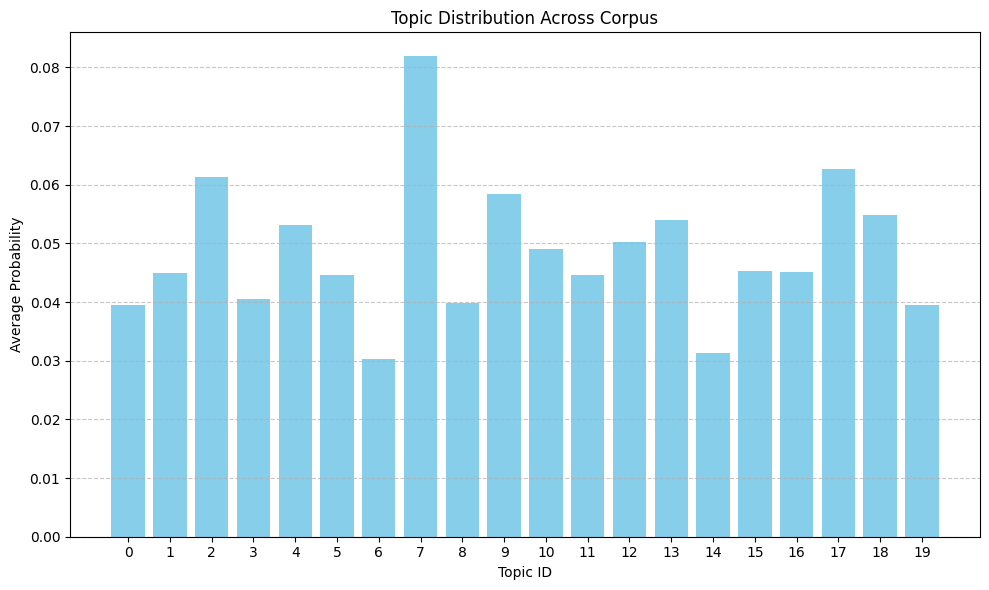

In [37]:
# Create a bar chart for topic distribution
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
plt.bar(range(len(topic_distribution)), topic_distribution, color='skyblue')  # Bar chart
plt.xlabel('Topic ID')  # X-axis label
plt.ylabel('Average Probability')  # Y-axis label
plt.title('Topic Distribution Across Corpus')  # Title of the graph
plt.xticks(range(len(topic_distribution)))  # Ensure all topic IDs are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid on y-axis for readability

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

<h1>Linear Regression<h1>

In [38]:
num_topics_list = [10, 10, 10, 15, 15, 12, 8, 20, 20, 10, 25, 100, 20, 20, 20,20, 20, 20, 18, 18, 25, 22, 20, 18, 18, 18]
passes_list = [15, 15, 15, 40, 40, 60, 60, 60, 60, 80, 60, 100, 200, 500, 80, 80, 80, 120, 150, 150, 60, 100, 100, 100, 200, 200]
iterations_list = [50, 50, 50, 100, 100, 120, 120,150,150,150,125,500,300, 600,120,120,120,120,150,120,125, 140,120,150,180,250]
alpha_list = [0.1, 0.1, 0.1, 0.1, 0.3, 0.5, 0.7,0.7,0.7,0.7,0.7,0.1,100,0.05,0.8,0.4,0.2,0.4,0.3,0.3,1,0.2,0.5,0.9,0.2,0.2]
eta_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.7, 0.1,0.05,0.05,0.6,0.6,0.8,0.4,0.3,0.3,0.5,0.8,0.2,0.2,0.3,0.2]
coherence_scores_list = [0.5590, 0.5665, 0.5576, 0.5803, 0.5950, 0.5949, 0.5565,0.5917,0.5987,0.5780,0.5967,0.4722, 0.5457, 0.5758, 0.5953, 0.6015, 0.5993, 0.6043, 0.5820, 0.5872, 0.5840, 0.5955, 0.6041, 0.5961, 0.5980, 0.5894]

In [39]:
indices_to_keep = [i for i in range(len(alpha_list)) if alpha_list[i] <= 1]

num_topics = np.array([num_topics_list[i] for i in indices_to_keep])
passes = np.array([passes_list[i] for i in indices_to_keep])
iterations = np.array([iterations_list[i] for i in indices_to_keep])
alpha = np.array([alpha_list[i] for i in indices_to_keep]) 
eta = np.array([eta_list[i] for i in indices_to_keep])           
coherence_scores = np.array([coherence_scores_list[i] for i in indices_to_keep])

X = np.column_stack((num_topics, passes, iterations, alpha, eta))
y = coherence_scores

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     13.40
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.12e-05
Time:                        21:52:11   Log-Likelihood:                 74.128
No. Observations:                  25   AIC:                            -136.3
Df Residuals:                      19   BIC:                            -128.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5776      0.008     70.625      0.000       0.560       0.595
x1            -0.0003      0.000     -0.702      0.491      -0.001       0.001
x2             0.0002   8.97e-05      2.749      0.013    5.89e-05       0.000
x3            -0.0002   8.81e-05     -2.288      0.034      -0.000   -1.72e-05
x4             0.0214      0.011      1.907      0.072      -0.002       0.045
x5             0.0282      0.014      2.016      0.058      -0.001       0.057
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.751
Skew:                          -0.148   Prob(JB):                        0.687
Kurtosis:                       2.204   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
def compute_r_squared(X_var, y_var):
    X_single = sm.add_constant(X_var)  # Add intercept
    model = sm.OLS(y_var, X_single).fit()
    return model.rsquared

r_squared_values = {
    "num_topics": compute_r_squared(num_topics, coherence_scores),
    "passes": compute_r_squared(passes, coherence_scores),
    "iterations": compute_r_squared(iterations, coherence_scores),
    "alpha": compute_r_squared(alpha, coherence_scores),
    "eta": compute_r_squared(eta, coherence_scores),
}

for key in r_squared_values:
    print(f"{key}: {r_squared_values[key]:.4f}")

num_topics: 0.5033
passes: 0.0024
iterations: 0.2119
alpha: 0.1101
eta: 0.1755


In [62]:
# Check if the number of features in X matches the length of feature_names
feature_names = ["num_topics", "passes", "iterations", "alpha", "eta"]

num_iterations = 3  # Set the number of iterations you want to run

# Collect feature importances across multiple iterations
all_importances = np.zeros((num_iterations, len(feature_names)))

for i in range(num_iterations):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train Random Forest Regressor (no random_state)
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    # Get feature importance for this iteration
    all_importances[i] = rf.feature_importances_
    print(rf.feature_importances_)

# Calculate the mean and standard deviation of feature importances across all iterations
mean_importances = np.mean(all_importances, axis=0)
std_importances = np.std(all_importances, axis=0)

# Print mean and standard deviation
print("Mean Feature Importances:", mean_importances)
print("Standard Deviation of Feature Importances:", std_importances)

[0.37018942 0.02072942 0.09837422 0.05635271 0.45435423]
[0.22388309 0.10908755 0.03531369 0.18746149 0.44425418]
[0.40818284 0.04613576 0.12807504 0.07171727 0.34588908]
Mean Feature Importances: [0.33408512 0.05865091 0.08725432 0.10517716 0.4148325 ]
Standard Deviation of Feature Importances: [0.0794533  0.03714172 0.03867735 0.05852094 0.04892442]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0100
Mean Absolute Error (MAE): 0.0073
R-squared (R²): 0.2930


num_topics: t-stat = 2.3866, p-value = 0.1397
passes: t-stat = -5.3820, p-value = 0.0328
iterations: t-stat = -4.1225, p-value = 0.0541
alpha: t-stat = -2.2915, p-value = 0.1490
eta: t-stat = 6.2100, p-value = 0.0250
num_topics is NOT statistically significant (p >= 0.05)
passes is statistically significant (p < 0.05)
iterations is NOT statistically significant (p >= 0.05)
alpha is NOT statistically significant (p >= 0.05)
eta is statistically significant (p < 0.05)


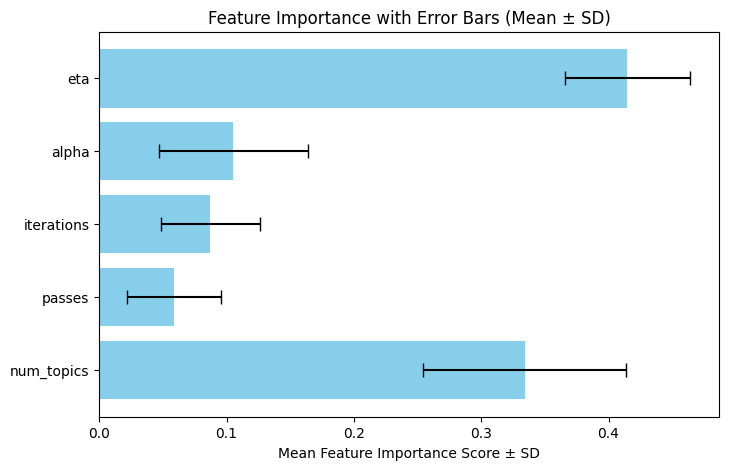

In [64]:
mean_of_all_importances = np.mean(mean_importances)
t_stats, p_values = stats.ttest_1samp(all_importances, mean_of_all_importances)

# Print t-test results
for name, t_stat, p_value in zip(feature_names, t_stats, p_values):
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Interpret the p-values
alpha_level = 0.05  # 5% significance level
for name, p_value in zip(feature_names, p_values):
    if p_value < alpha_level:
        print(f"{name} is statistically significant (p < {alpha_level})")
    else:
        print(f"{name} is NOT statistically significant (p >= {alpha_level})")

# Plot feature importance means with error bars
plt.figure(figsize=(8, 5))
plt.barh(feature_names, mean_importances, xerr=std_importances, color="skyblue", capsize=5)
plt.xlabel("Mean Feature Importance Score ± SD")
plt.title("Feature Importance with Error Bars (Mean ± SD)")
plt.show()